# Importing  libraries & dependencies

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.tree import *
from xgboost import *
from catboost import *
from lightgbm import *
from sklearn.model_selection import *
import itertools
from itertools import product
from tqdm import tqdm
import optuna
from hyperopt import *
from hyperopt.pyll.base import scope
from sklearn.metrics import *
from sklearn.calibration import *
import shap
from scipy.special import softmax
shap.initjs()
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
import joblib
import pickle
plt.style.use('ggplot')

In [4]:
# Import Data
df = pd.read_csv("E:/creditcard.csv")

In [5]:
pd.options.display.max_columns = None

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [103]:
# Drop Unnecessary Variable
credit = df.drop('Time', axis = 1)     # axis = 1 means Column

In [104]:
# Determine number of Row & Columns
credit.shape

(284807, 30)

In [9]:
# Check Duplicate Observations
credit.duplicated().any()

True

In [105]:
# Drop Duplicate Observations
credit.drop_duplicates(inplace = True)
credit.shape

(275663, 30)

In [101]:
# Checking the number of missing values in each column
credit.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [106]:
# Make a Copy Of the data
credit2 = credit.copy()

In [109]:
# Cheking information of the Data
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     275663 

In [108]:
# Summary of the Data
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,275663.0,-0.037460,1.952522,-56.407510,-0.941105,-0.059659,1.294471,2.454930
V2,275663.0,-0.002430,1.667260,-72.715728,-0.614040,0.070249,0.819067,22.057729
V3,275663.0,0.025520,1.507538,-48.325589,-0.843168,0.200736,1.048461,9.382558
V4,275663.0,-0.004359,1.424323,-5.683171,-0.862847,-0.035098,0.753943,16.875344
V5,275663.0,-0.010660,1.378117,-113.743307,-0.700192,-0.060556,0.604521,34.801666
V6,275663.0,-0.014206,1.313213,-26.160506,-0.765861,-0.270931,0.387704,73.301626
V7,275663.0,0.008586,1.240348,-43.557242,-0.552047,0.044848,0.583885,120.589494
V8,275663.0,-0.005698,1.191596,-73.216718,-0.209618,0.022980,0.322319,20.007208
V9,275663.0,-0.012363,1.100108,-13.434066,-0.659904,-0.064724,0.593098,15.594995
V10,275663.0,0.003114,1.087025,-24.588262,-0.538968,-0.091752,0.470702,23.745136


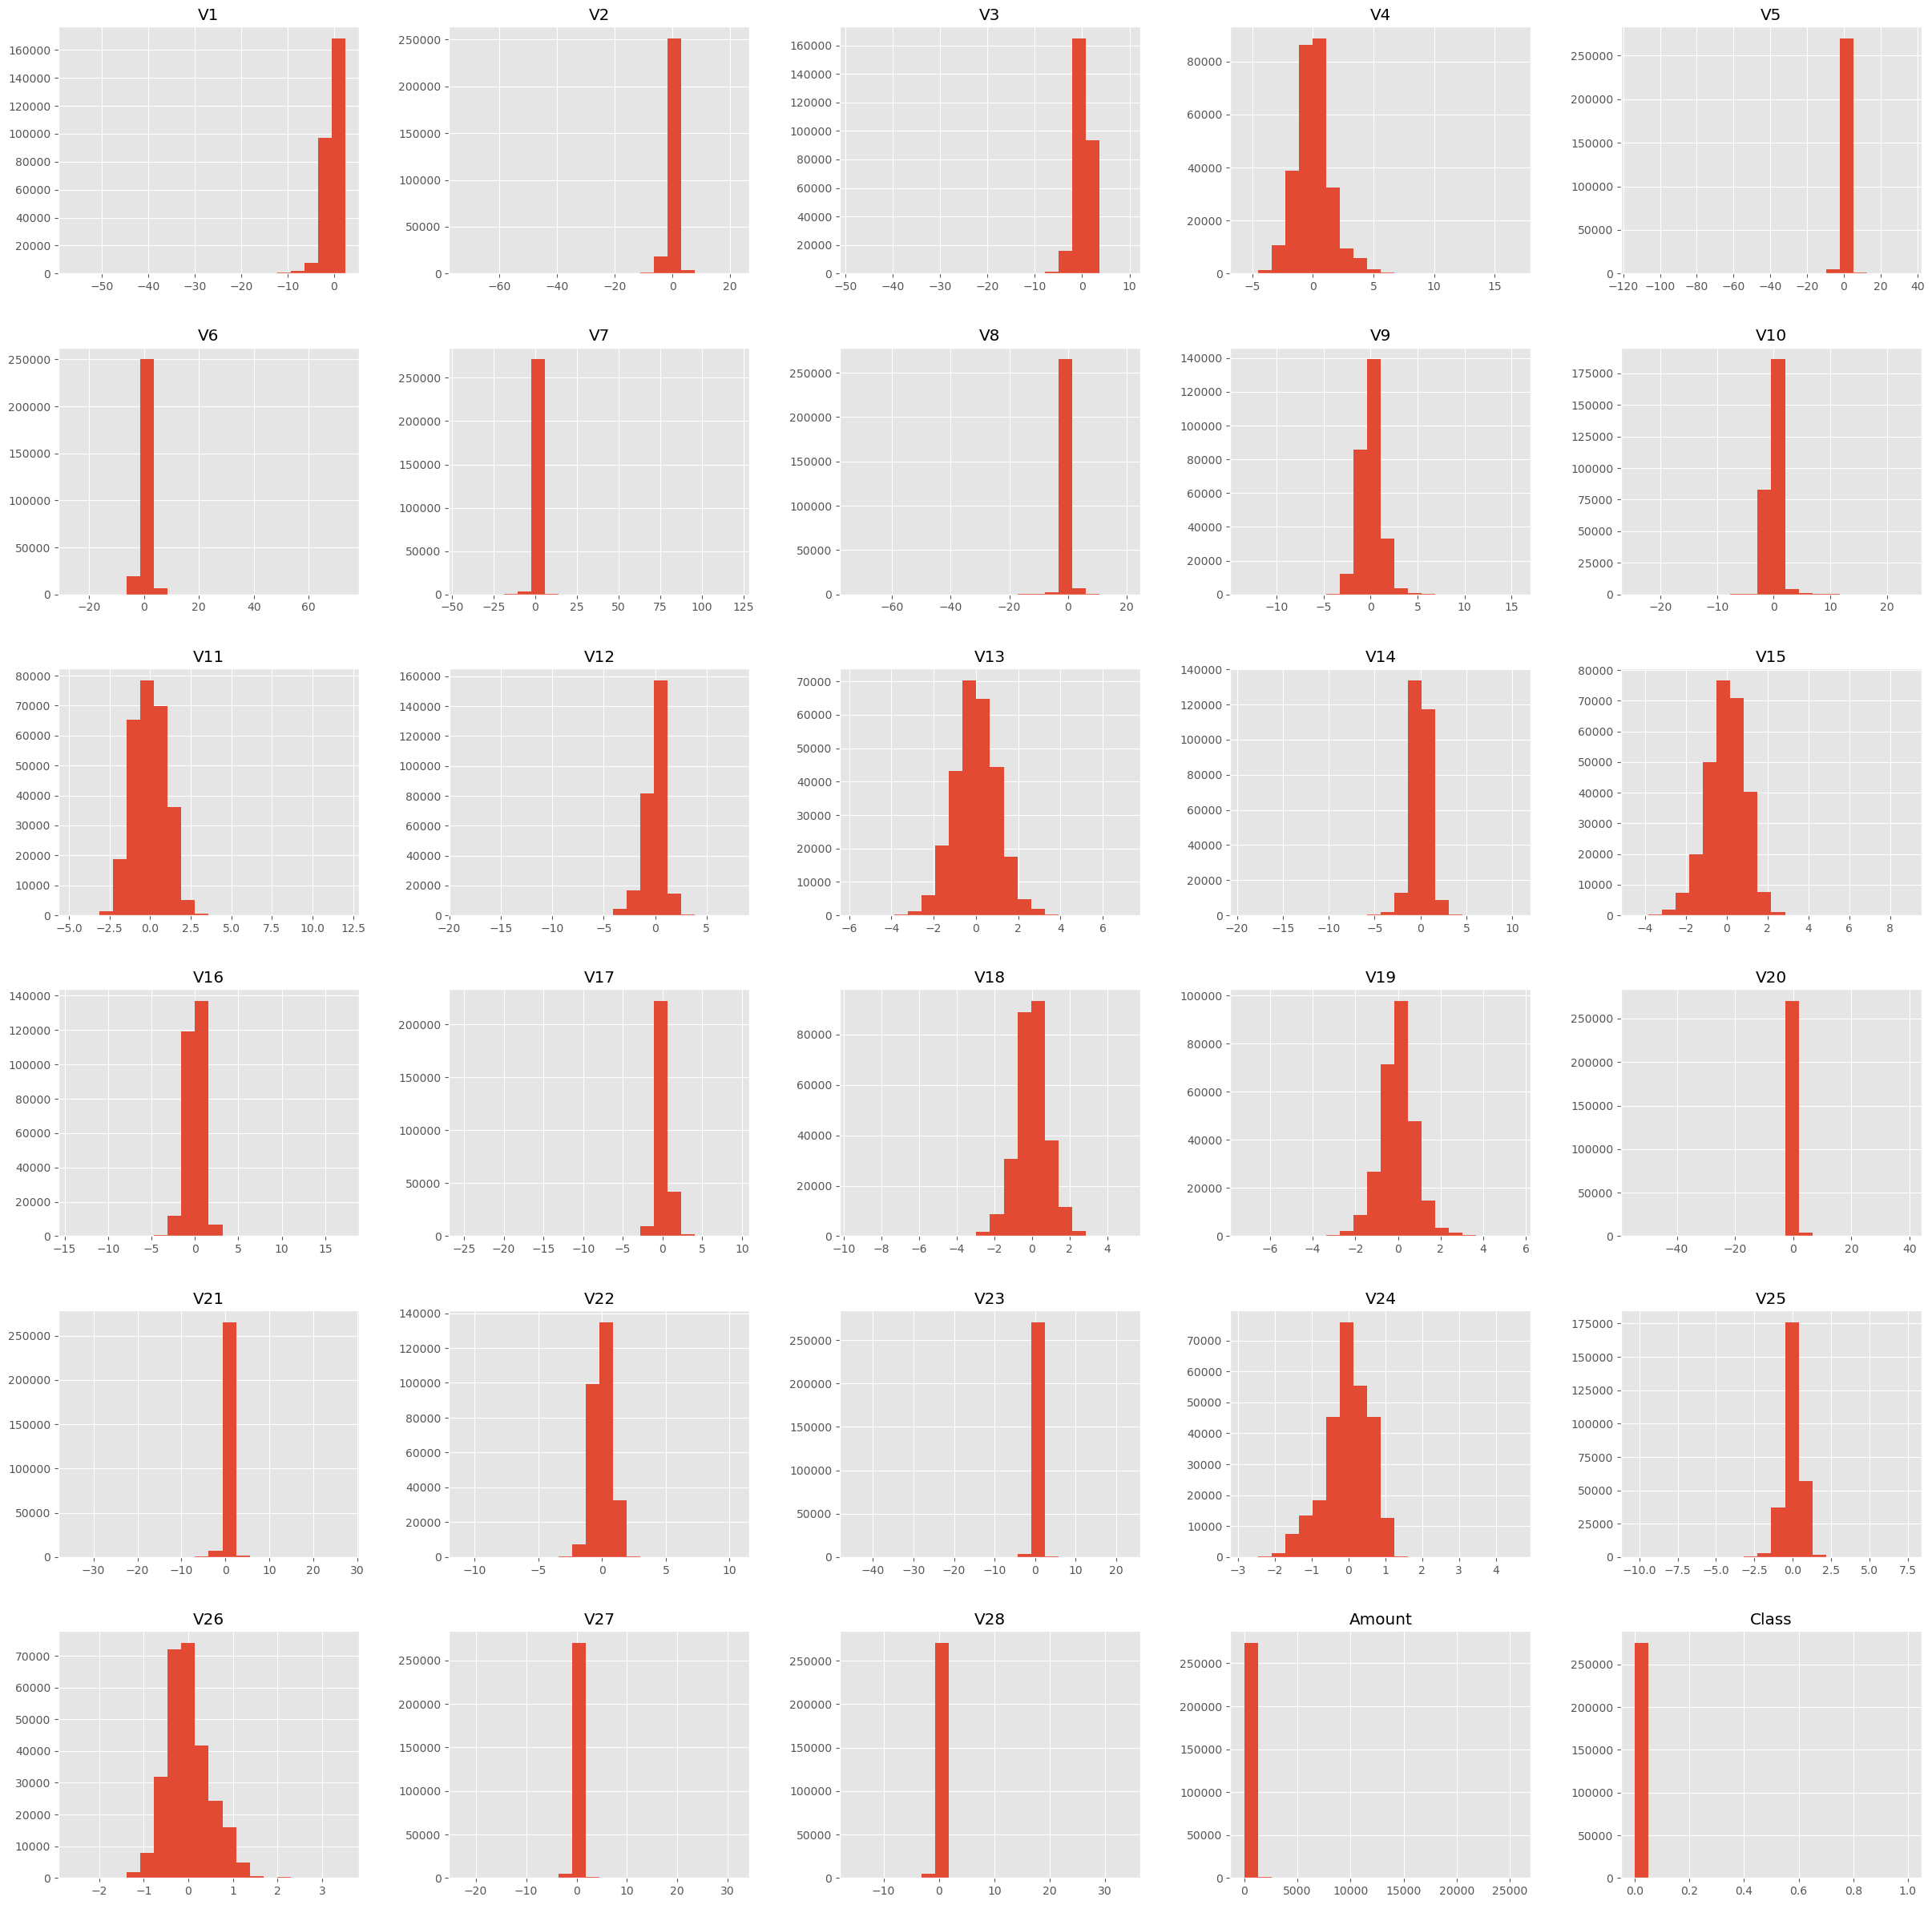

In [110]:
# Histograms
credit.hist(bins = 20, figsize = (30, 30))
plt.show()

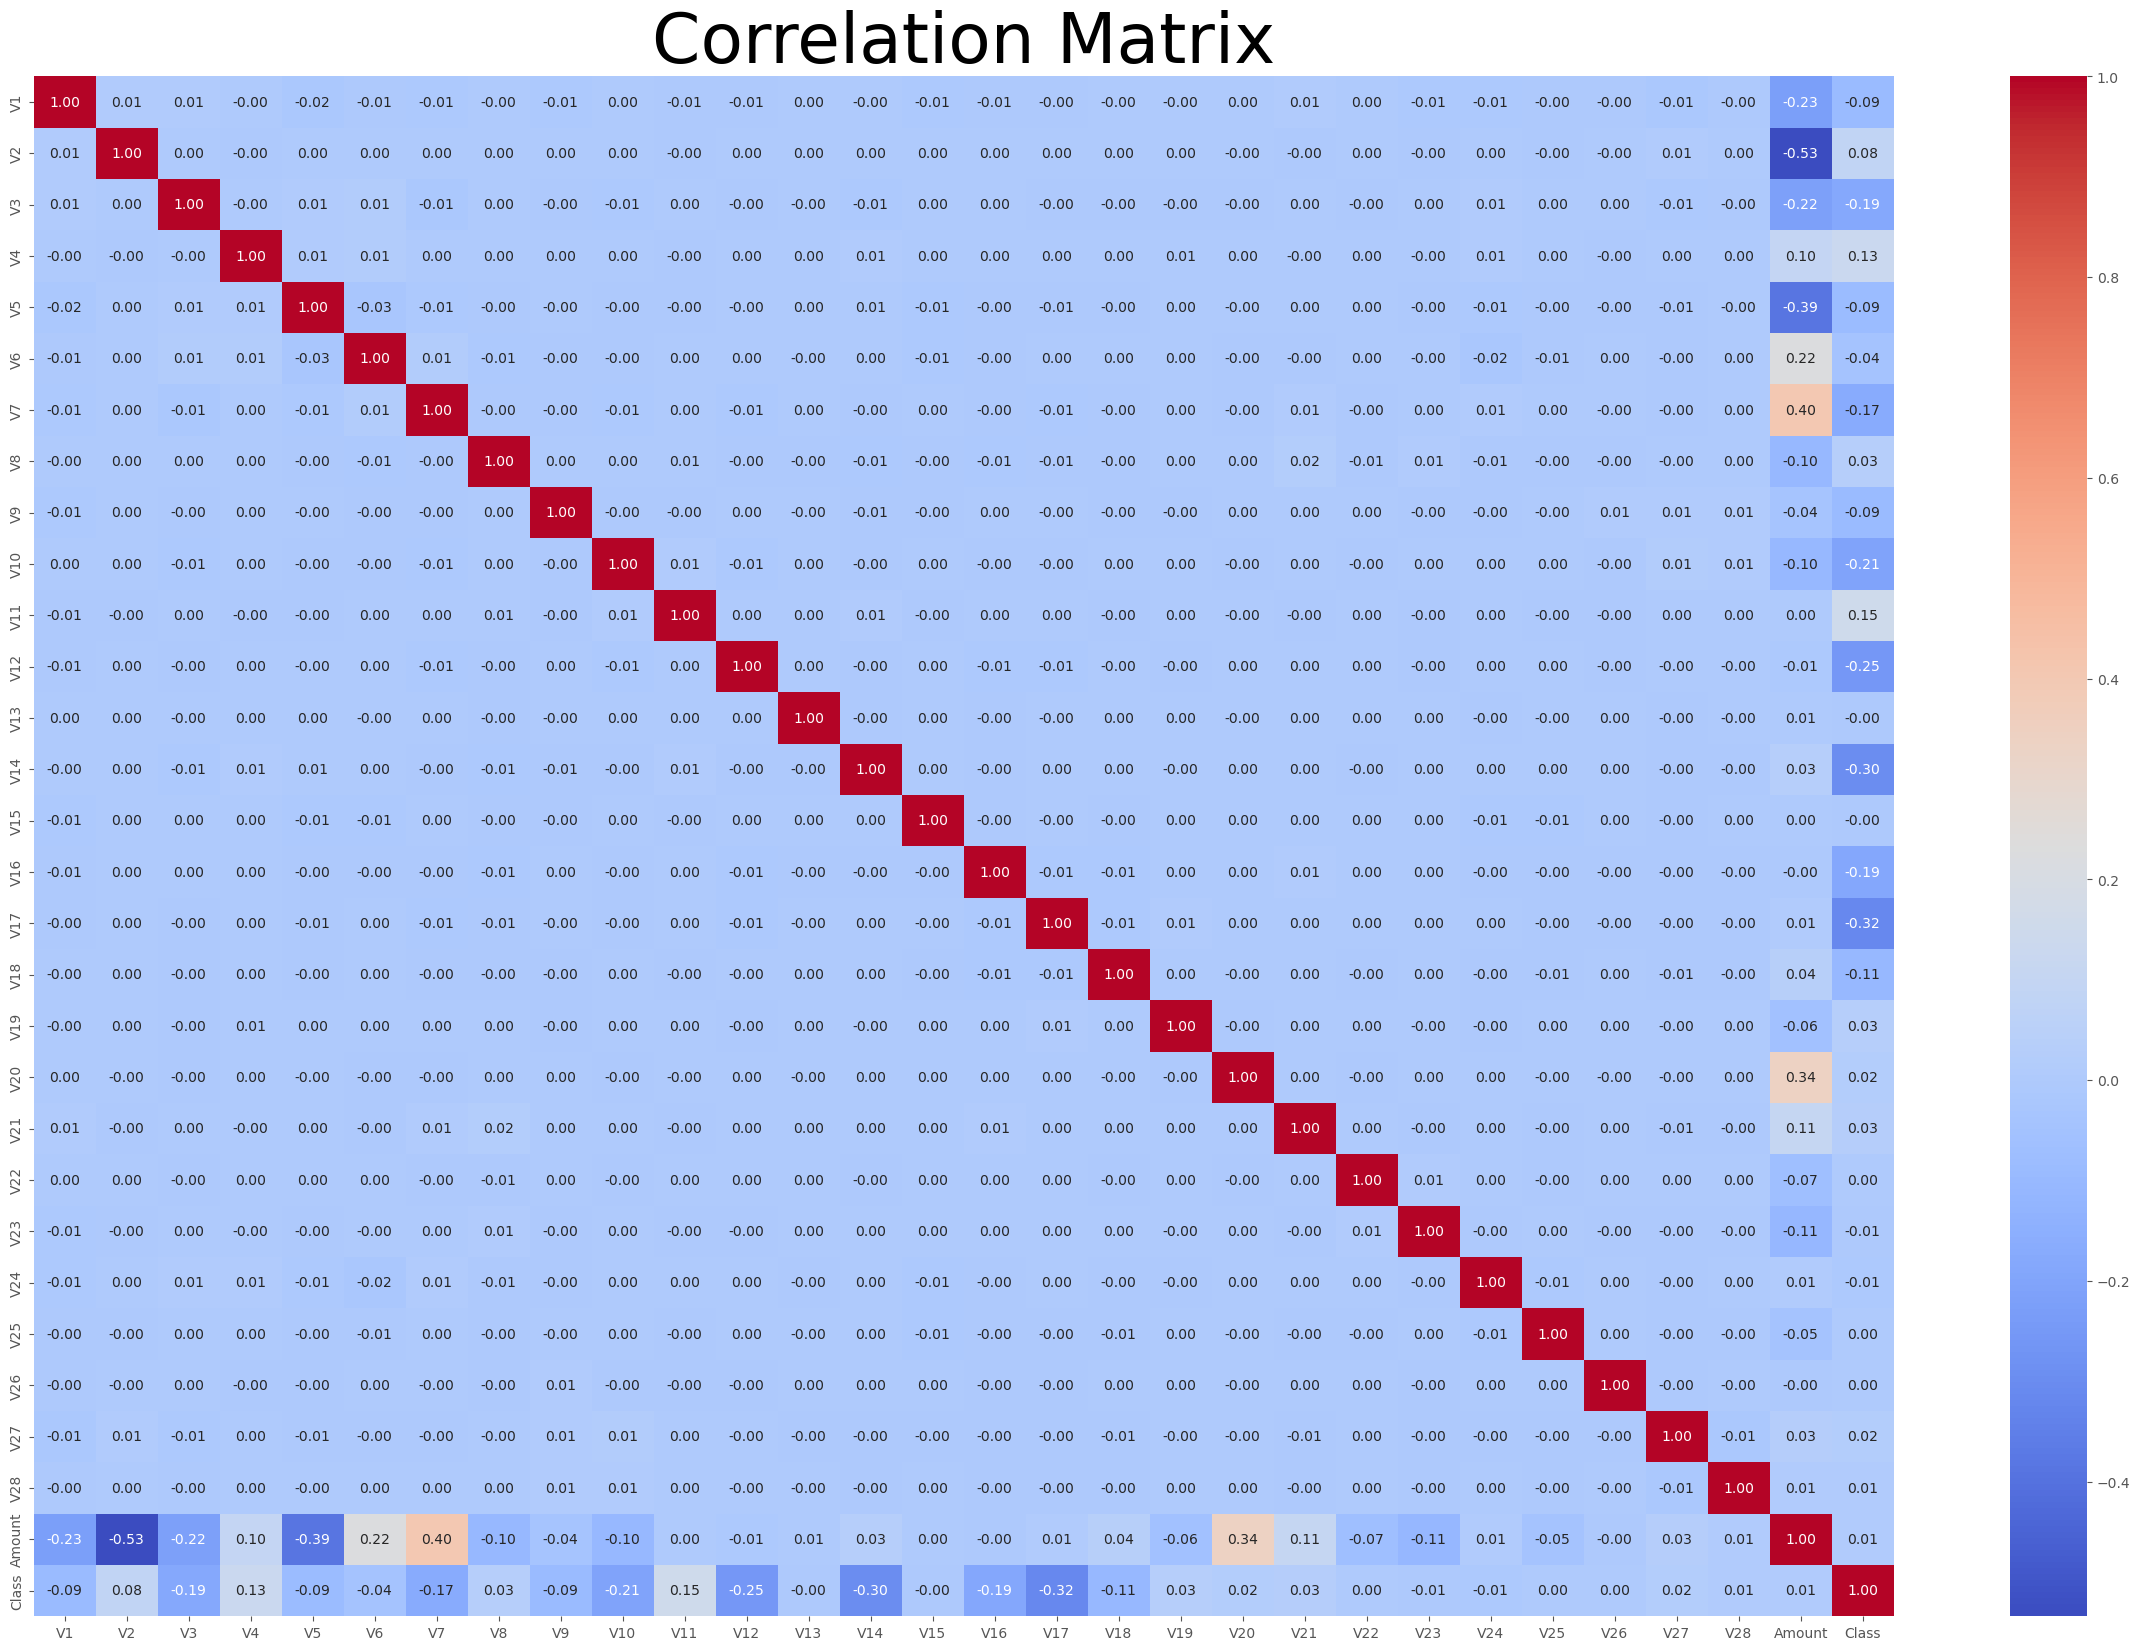

In [102]:
# Heatmap
corr_mat = credit.corr()
fig = plt.figure(figsize = (30, 20))
sns.heatmap(corr_mat, annot = True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', size = 50)
plt.show()

In [111]:
# frequency of legit transaction & fradulent transaction
credit['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

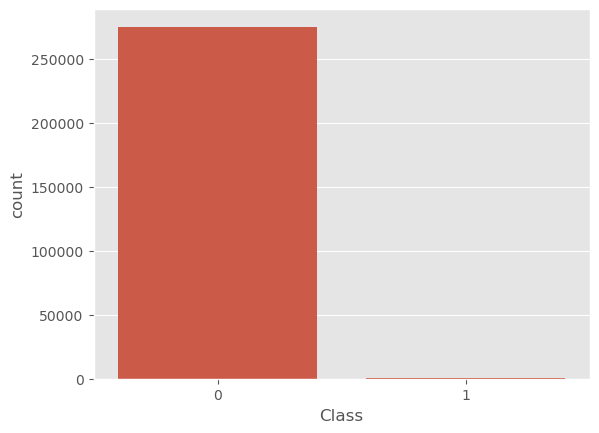

In [113]:
# Visualize Imbalanced Target Class
sns.countplot(x = 'Class', data = credit)
plt.show()

In [114]:
# Distribution of legit transaction & fradulent transaction
legit = credit[credit['Class'] == 0]
fraud = credit[credit.Class == 1]

In [115]:
print(legit.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [117]:
# Summary of Amount Variable
credit['Amount'].describe()

count    275663.000000
mean         90.578380
std         253.213954
min           0.000000
25%           6.300000
50%          23.740000
75%          79.910000
max       25691.160000
Name: Amount, dtype: float64

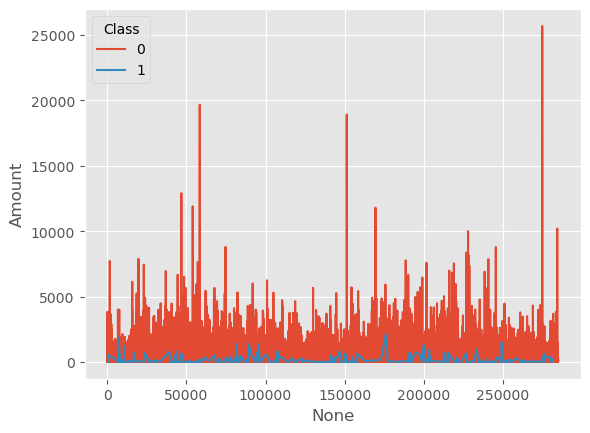

In [118]:
sns.lineplot(x=credit.index, y=credit['Amount'], hue=credit['Class'])
plt.show()

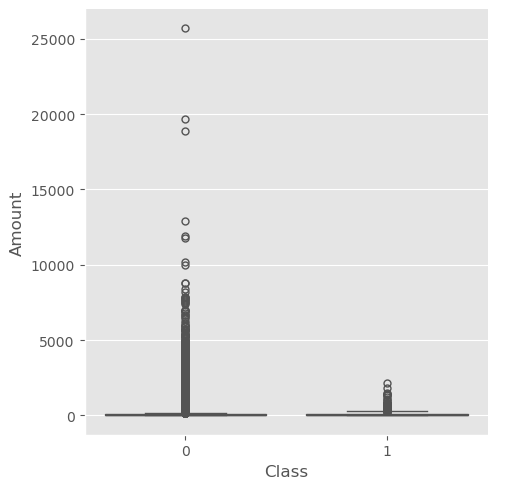

In [119]:
sns.catplot(x='Class', y='Amount', data=credit, kind='box')
plt.show()

In [120]:
legit.Amount.describe()

count    275190.000000
mean         90.521154
std         253.198478
min           0.000000
25%           6.390000
50%          23.750000
75%          79.900000
max       25691.160000
Name: Amount, dtype: float64

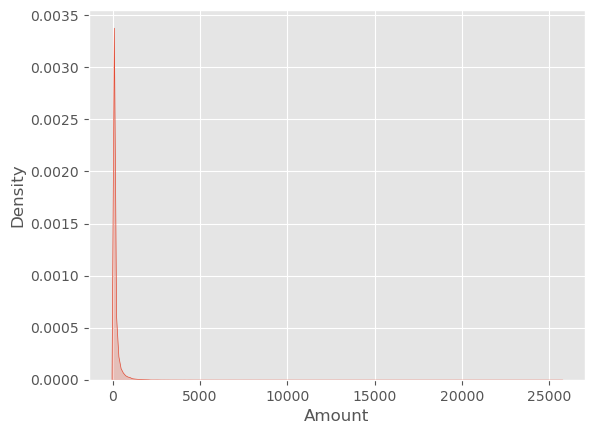

In [123]:
# Density plot of Amount Variable
sns.kdeplot(data=legit['Amount'], shade=True)
plt.show()

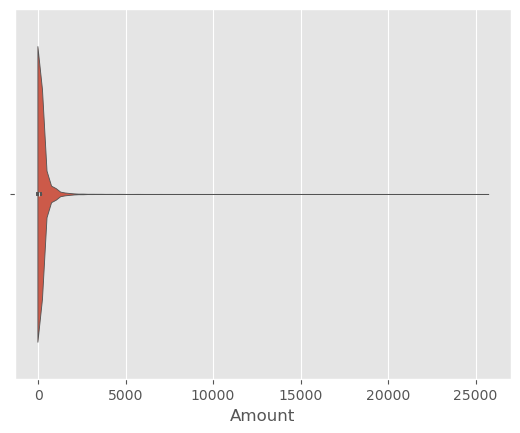

In [124]:
# Violin plot of Amount Variable
sns.violinplot(x = 'Amount', data = legit)
plt.show()

In [125]:
# Summary of Fraudulant Transaction Amount
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

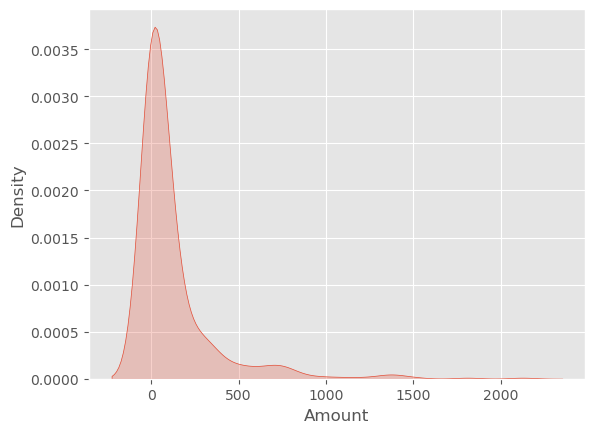

In [127]:
# Density Plot of Fraudulant Amount
sns.kdeplot(data=fraud['Amount'], shade=True)
plt.show()

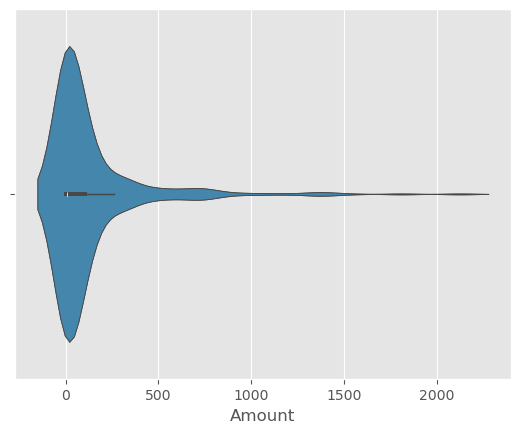

In [129]:
# Violin Plot of Fraudulant Amount
sns.violinplot(x = 'Amount', data = fraud)
plt.show()

In [130]:
# Compare the mean values for both transactions
credit.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,-0.013574,0.005134,0.000702,0.012432,-0.010208,0.002550,0.011589,0.007588,-0.000638,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,90.521154
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [131]:
# Feature-Target Distribution
X = credit.drop('Class', axis = 1)
y = credit['Class']

In [137]:
X.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [136]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

#### Data Standardization

In [138]:
# Normalize the Data
scaler = StandardScaler()
credit['Amount'] = scaler.fit_transform(pd.DataFrame(credit['Amount']))

In [139]:
credit3 = credit.copy()

# Train Test Split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, stratify = y, random_state = 52)

In [142]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(275663, 29) (220530, 29) (55133, 29) (275663,) (220530,) (55133,)


# Model Evaluation

## Logistic Regression

In [144]:
LR = LogisticRegression(random_state=52)

In [145]:
LR.fit(X_train, y_train)

LogisticRegression(random_state=52)

In [147]:
# Training Score
LR.score(X_train, y_train)

0.999147508275518

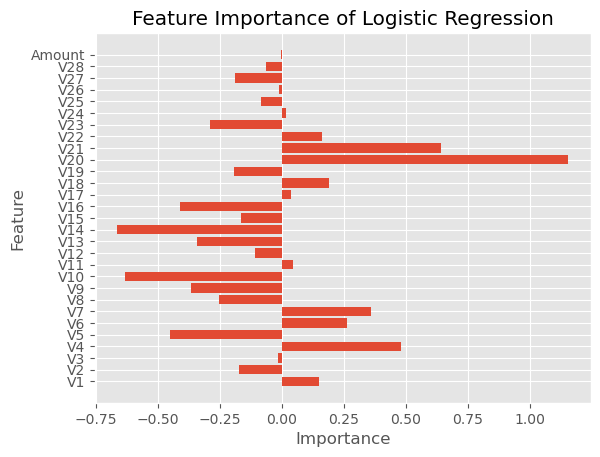

In [158]:
importance = LR.coef_[0]
plt.barh(LR.feature_names_in_, importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Logistic Regression')
plt.show()

In [159]:
y_pred = LR.predict(X_test)

In [160]:
print('Classification Report\n', classification_report(y_test, y_pred, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

Classification Report
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55038
       Fraud       0.78      0.63      0.70        95

    accuracy                           1.00     55133
   macro avg       0.89      0.82      0.85     55133
weighted avg       1.00      1.00      1.00     55133
 
Confusion Matrix
 [[55021    17]
 [   35    60]]


<Axes: >

In [161]:
print(
    '\nAccuracy Score     :     ', accuracy_score(y_test, y_pred),
    '\nPrecision Score    :     ', precision_score(y_test, y_pred),
    '\nRecall Score       :     ', recall_score(y_test, y_pred),
    '\nF1 Score           :     ', f1_score(y_test, y_pred)
)


Accuracy Score     :      0.9990568262202311 
Precision Score    :      0.7792207792207793 
Recall Score       :      0.631578947368421 
F1 Score           :      0.6976744186046512


fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

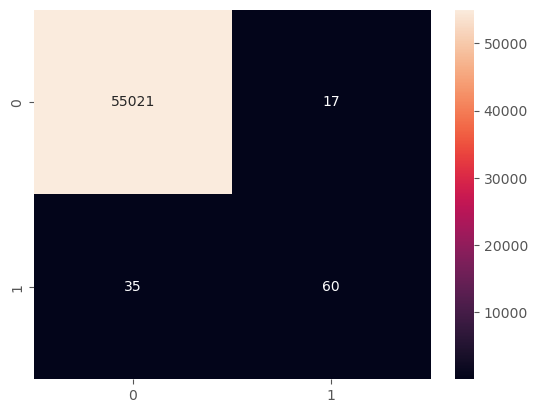

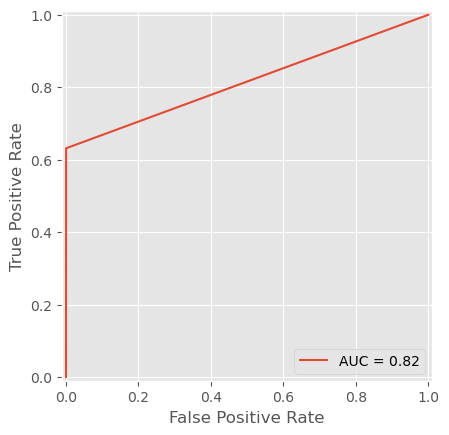

In [162]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()
plt.show()

# UnderSampling

## Build a sample dataset containing similar distribution of normal transaction and fraudulent transaction

In [180]:
credit['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [181]:
legit_sample = legit.sample(n = 473)

In [182]:
legit_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
205115,1.909452,-0.281085,-0.493446,0.712957,-0.877281,-1.514412,-0.076165,-0.289252,1.027902,-0.097354,-0.149921,0.522494,-0.505332,0.278795,0.351929,-0.436686,-0.059687,-0.319285,-0.461893,-0.238765,0.215084,0.764595,0.171915,0.947549,-0.055361,-0.266031,0.001429,-0.035802,33.20,0
149424,-1.986696,-1.375702,-0.183097,3.637128,4.525768,-1.913720,-0.232411,-0.082647,-0.565559,0.729240,-0.617969,-2.804147,1.742636,2.014142,-2.457815,0.097848,0.078595,-0.262576,-1.827305,0.532256,0.403759,0.519090,0.567484,0.604489,-0.586031,-0.126306,0.059265,0.318020,47.67,0
284776,-1.143909,1.780421,-0.454124,-0.814393,0.514689,-0.926634,1.196374,-0.349255,0.863877,1.816424,1.218465,0.902562,0.402504,-0.132959,-0.132437,-0.584920,-0.853781,0.348526,0.076049,0.751710,0.173511,1.491648,-0.156954,0.053810,-0.630124,-0.301970,0.425852,-0.109068,7.22,0
112447,-0.346828,0.813354,0.858520,0.327417,0.016580,0.101173,1.772517,-0.485735,-0.382305,-0.229796,-1.145766,-0.435127,0.277653,-0.071548,0.810786,0.168990,-0.866086,0.250518,0.071633,0.038044,0.002232,0.182982,-0.260113,-0.441029,0.356936,-0.355586,-0.188966,-0.249607,179.95,0
277727,-0.061570,0.111809,0.156802,-1.838820,-0.220939,0.167108,0.319967,-0.388053,-0.451898,1.247665,0.358180,-0.248004,0.540479,-0.814153,-0.745581,1.023936,-0.410303,-0.684174,1.334898,0.061526,0.249614,1.038162,-0.116848,-0.765844,-0.785818,-0.334394,-1.001527,-0.678962,57.00,0


In [183]:
legit_sample.shape

(473, 30)

## Concatenating Two DataFrames

In [186]:
new_credit = pd.concat([legit_sample, fraud], axis = 0).reset_index(drop=True)   # axis = 0 means Row

In [187]:
new_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.909452,-0.281085,-0.493446,0.712957,-0.877281,-1.514412,-0.076165,-0.289252,1.027902,-0.097354,-0.149921,0.522494,-0.505332,0.278795,0.351929,-0.436686,-0.059687,-0.319285,-0.461893,-0.238765,0.215084,0.764595,0.171915,0.947549,-0.055361,-0.266031,0.001429,-0.035802,33.20,0
1,-1.986696,-1.375702,-0.183097,3.637128,4.525768,-1.913720,-0.232411,-0.082647,-0.565559,0.729240,-0.617969,-2.804147,1.742636,2.014142,-2.457815,0.097848,0.078595,-0.262576,-1.827305,0.532256,0.403759,0.519090,0.567484,0.604489,-0.586031,-0.126306,0.059265,0.318020,47.67,0
2,-1.143909,1.780421,-0.454124,-0.814393,0.514689,-0.926634,1.196374,-0.349255,0.863877,1.816424,1.218465,0.902562,0.402504,-0.132959,-0.132437,-0.584920,-0.853781,0.348526,0.076049,0.751710,0.173511,1.491648,-0.156954,0.053810,-0.630124,-0.301970,0.425852,-0.109068,7.22,0
3,-0.346828,0.813354,0.858520,0.327417,0.016580,0.101173,1.772517,-0.485735,-0.382305,-0.229796,-1.145766,-0.435127,0.277653,-0.071548,0.810786,0.168990,-0.866086,0.250518,0.071633,0.038044,0.002232,0.182982,-0.260113,-0.441029,0.356936,-0.355586,-0.188966,-0.249607,179.95,0
4,-0.061570,0.111809,0.156802,-1.838820,-0.220939,0.167108,0.319967,-0.388053,-0.451898,1.247665,0.358180,-0.248004,0.540479,-0.814153,-0.745581,1.023936,-0.410303,-0.684174,1.334898,0.061526,0.249614,1.038162,-0.116848,-0.765844,-0.785818,-0.334394,-1.001527,-0.678962,57.00,0


In [188]:
new_credit.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
945,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [189]:
new_credit.shape

(946, 30)

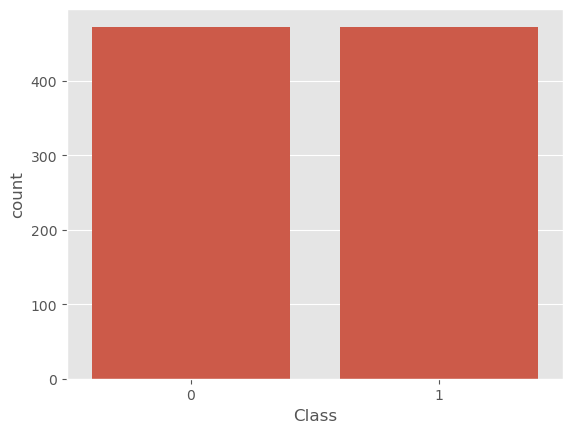

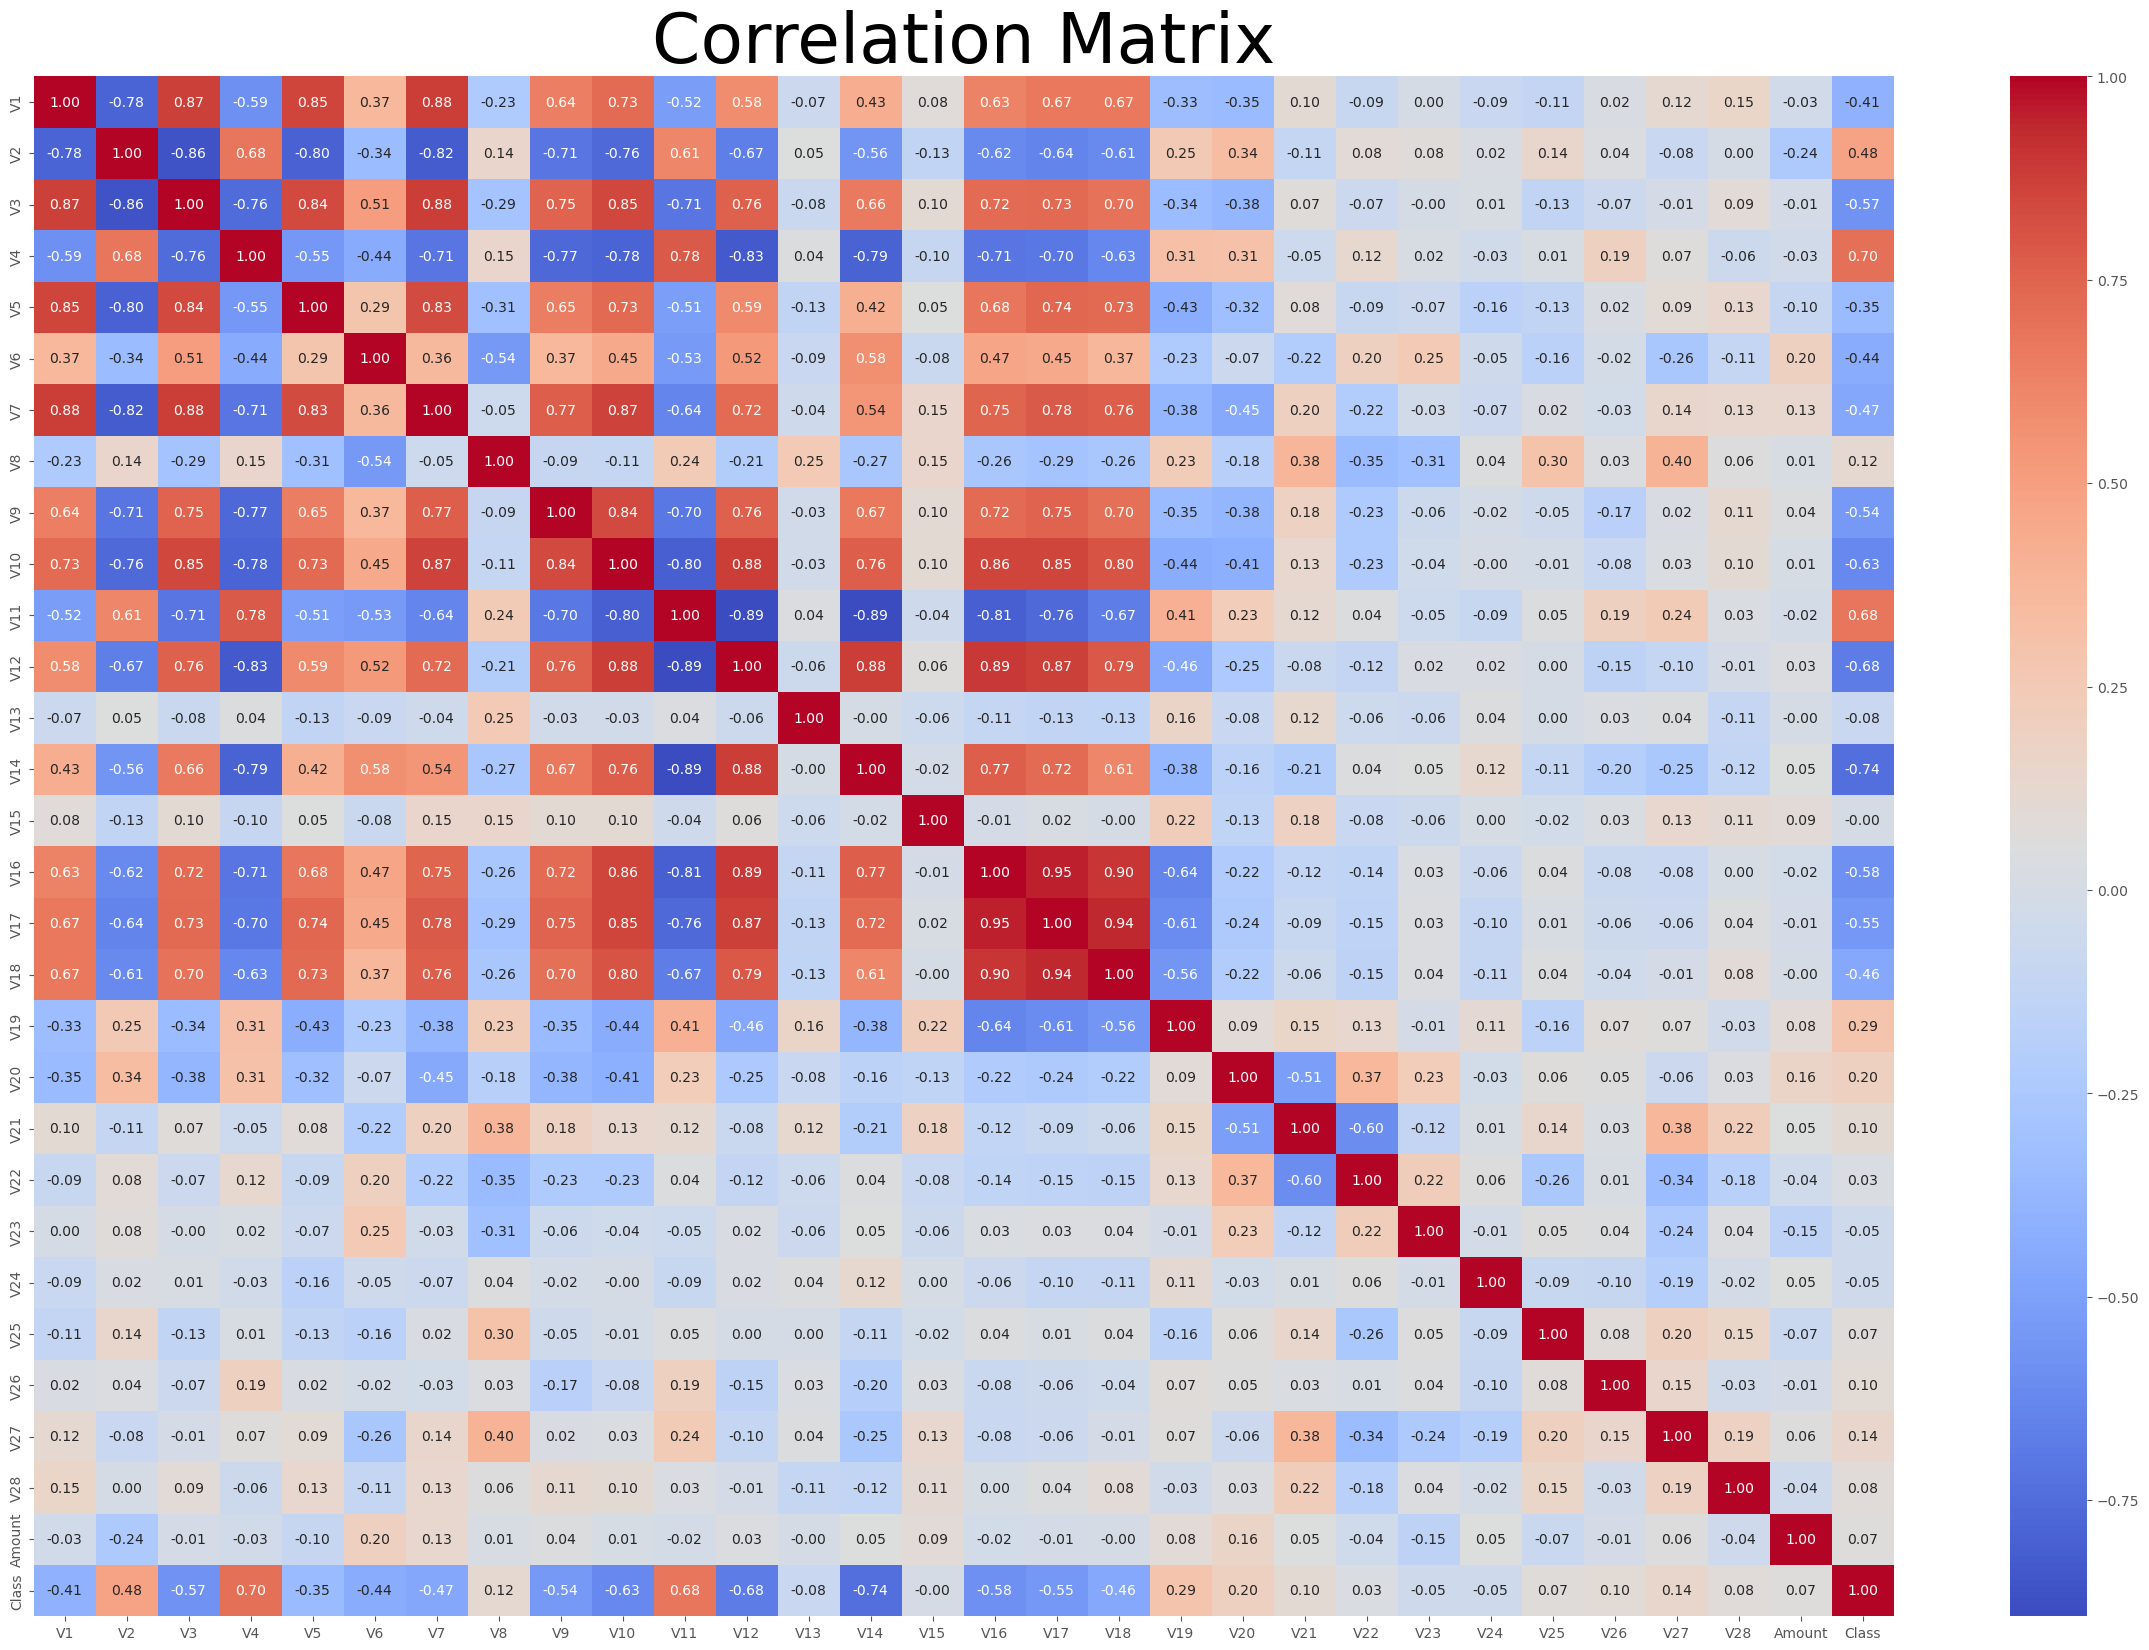

In [190]:
corr = new_credit.corr()
fig = plt.figure(figsize = (30, 20))
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', size = 50)
plt.show()

In [191]:
new_credit['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [192]:
sns.countplot(x = 'Class', data = new_credit)

<Axes: xlabel='Class', ylabel='count'>

In [193]:
new_credit.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.137481,0.039348,0.151668,-0.010849,-0.072729,0.001175,0.024076,0.008507,-0.074088,0.001689,-0.011198,0.068242,0.073289,-0.008834,-0.064811,-0.001783,-0.007473,0.043732,-0.085099,-0.004808,0.041779,0.035786,0.006070,-0.050659,-0.051132,-0.043379,-0.047609,0.005539,92.574841
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## Splitting The Data into Features and Targets

X = new_credit.iloc[:,:-1]

y = new_credit.iloc[:,-1]

In [194]:
X1 = new_credit.drop('Class', axis = 1)
y1 = new_credit['Class']

In [195]:
X1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.909452,-0.281085,-0.493446,0.712957,-0.877281,-1.514412,-0.076165,-0.289252,1.027902,-0.097354,-0.149921,0.522494,-0.505332,0.278795,0.351929,-0.436686,-0.059687,-0.319285,-0.461893,-0.238765,0.215084,0.764595,0.171915,0.947549,-0.055361,-0.266031,0.001429,-0.035802,33.20
1,-1.986696,-1.375702,-0.183097,3.637128,4.525768,-1.913720,-0.232411,-0.082647,-0.565559,0.729240,-0.617969,-2.804147,1.742636,2.014142,-2.457815,0.097848,0.078595,-0.262576,-1.827305,0.532256,0.403759,0.519090,0.567484,0.604489,-0.586031,-0.126306,0.059265,0.318020,47.67
2,-1.143909,1.780421,-0.454124,-0.814393,0.514689,-0.926634,1.196374,-0.349255,0.863877,1.816424,1.218465,0.902562,0.402504,-0.132959,-0.132437,-0.584920,-0.853781,0.348526,0.076049,0.751710,0.173511,1.491648,-0.156954,0.053810,-0.630124,-0.301970,0.425852,-0.109068,7.22
3,-0.346828,0.813354,0.858520,0.327417,0.016580,0.101173,1.772517,-0.485735,-0.382305,-0.229796,-1.145766,-0.435127,0.277653,-0.071548,0.810786,0.168990,-0.866086,0.250518,0.071633,0.038044,0.002232,0.182982,-0.260113,-0.441029,0.356936,-0.355586,-0.188966,-0.249607,179.95
4,-0.061570,0.111809,0.156802,-1.838820,-0.220939,0.167108,0.319967,-0.388053,-0.451898,1.247665,0.358180,-0.248004,0.540479,-0.814153,-0.745581,1.023936,-0.410303,-0.684174,1.334898,0.061526,0.249614,1.038162,-0.116848,-0.765844,-0.785818,-0.334394,-1.001527,-0.678962,57.00


In [196]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Split the data into Training Data & Testing Data

In [197]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, stratify = y1, random_state = 52)

In [198]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(946, 29) (220530, 29) (55133, 29) (946,) (220530,) (55133,)


## Model Evaluation

### Logistic Regression

In [203]:
# Training the Logistic Regression Model
LR1 = LogisticRegression(random_state = 52)
LR1.fit(X_train1, y_train1)
LR1.score(X_train1, y_train1)

0.9457671957671958

In [204]:
y_pred1 = LR1.predict(X_test1)
print('Classification Report:\n', classification_report(y_test1, y_pred1, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test1, y_pred1),
      '\nAccuracy Score:\n', accuracy_score(y_test1, y_pred1))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       0.93      0.95      0.94        95
       Fraud       0.95      0.93      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190
 
Confusion Matrix:
 [[90  5]
 [ 7 88]] 
Accuracy Score:
 0.9368421052631579


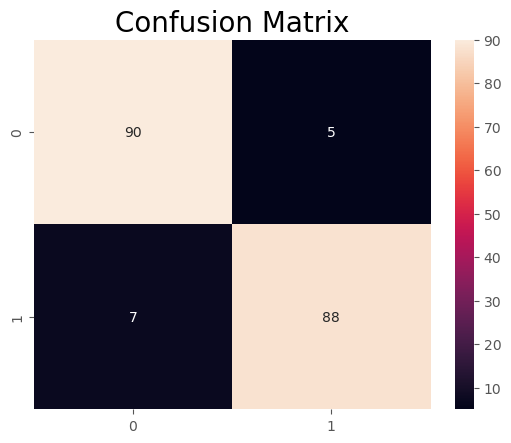

In [205]:
sns.heatmap(confusion_matrix(y_test1, y_pred1), annot = True, fmt = 'd')
plt.title('Confusion Matrix', size = 20)
plt.show()

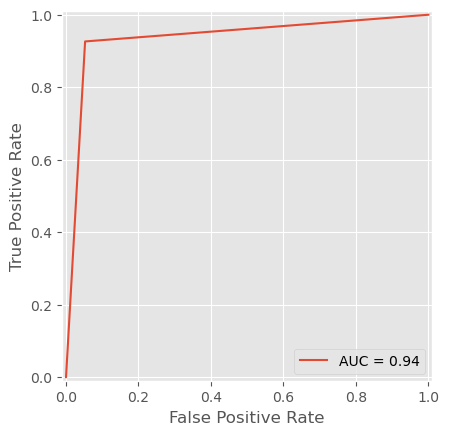

In [206]:
fpr1, tpr1, threshold = roc_curve(y_test1, y_pred1)
roc_auc1 = roc_auc_score(y_test1, y_pred1)
RocCurveDisplay(fpr = fpr1, tpr = tpr1, roc_auc = roc_auc1).plot()
plt.show()

### Decision Tree Classifier

In [207]:
DT1 = DecisionTreeClassifier(random_state = 52)
DT1.fit(X_train1, y_train1)
DT1.score(X_train1, y_train1)

1.0

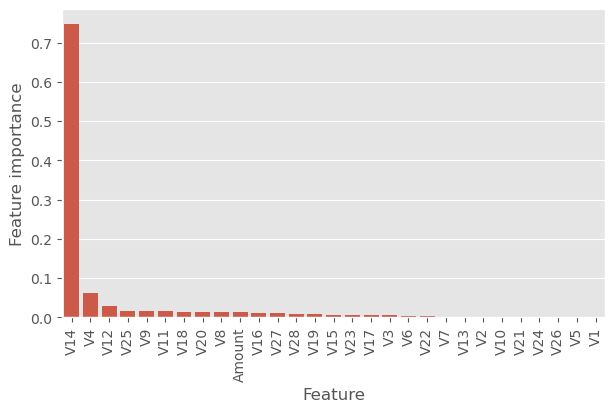

In [208]:
tmp = pd.DataFrame({'Feature': X1.columns, 'Feature importance': DT1.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
sns.barplot(x='Feature', y='Feature importance',data=tmp)
plt.xticks(rotation=90)
plt.show()

In [210]:
y_pred2 = DT1.predict(X_test1)
print('Classification Report:\n', classification_report(y_test1, y_pred2, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test1, y_pred2),
      '\nAccuracy Score:\n', accuracy_score(y_test1, y_pred2))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       0.93      0.93      0.93        95
       Fraud       0.93      0.93      0.93        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190
 
Confusion Matrix:
 [[88  7]
 [ 7 88]] 
Accuracy Score:
 0.9263157894736842


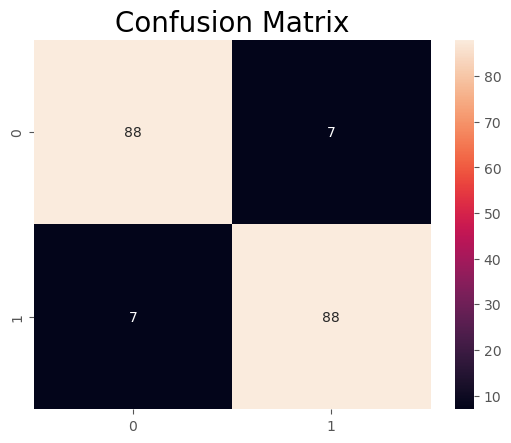

In [211]:
sns.heatmap(confusion_matrix(y_test1, y_pred2), annot = True, fmt='d')
plt.title('Confusion Matrix', size = 20)
plt.show()

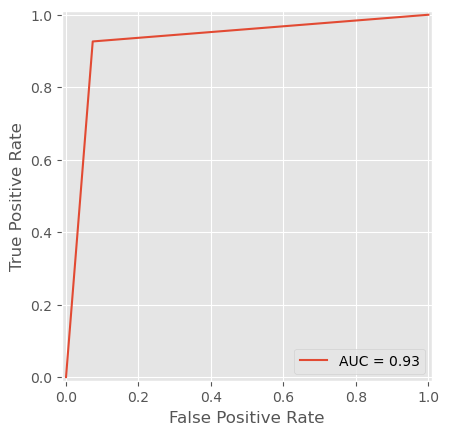

In [212]:
fpr2, tpr2, threshold = roc_curve(y_test1, y_pred2)
roc_auc2 = roc_auc_score(y_test1, y_pred2)
RocCurveDisplay(fpr = fpr2, tpr = tpr2, roc_auc = roc_auc2).plot()
plt.show()

### Random Forest Classifier

In [214]:
RF1 = RandomForestClassifier(random_state = 52)
RF1.fit(X_train1, y_train1)
RF1.score(X_train1, y_train1)

1.0

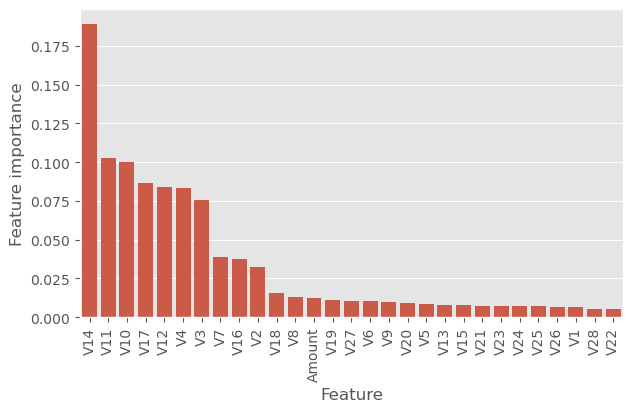

In [215]:
tmp = pd.DataFrame({'Feature': X1.columns, 'Feature importance': RF1.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending = False)
plt.figure(figsize = (7,4))
sns.barplot(x = 'Feature', y='Feature importance', data=tmp)
plt.xticks(rotation = 90)
plt.show()

In [217]:
y_pred3 = RF1.predict(X_test1)
print('Classification Report:\n', classification_report(y_test1, y_pred3, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test1, y_pred3),
      '\n\nAccuracy Score:\n', accuracy_score(y_test1, y_pred3))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       0.91      0.97      0.94        95
       Fraud       0.97      0.91      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190
 
Confusion Matrix:
 [[92  3]
 [ 9 86]] 

Accuracy Score:
 0.9368421052631579


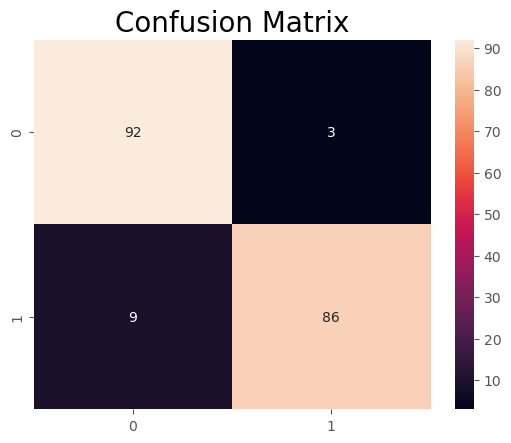

In [218]:
sns.heatmap(confusion_matrix(y_test1, y_pred3), annot = True, fmt='d')
plt.title('Confusion Matrix', size = 20)
plt.show()

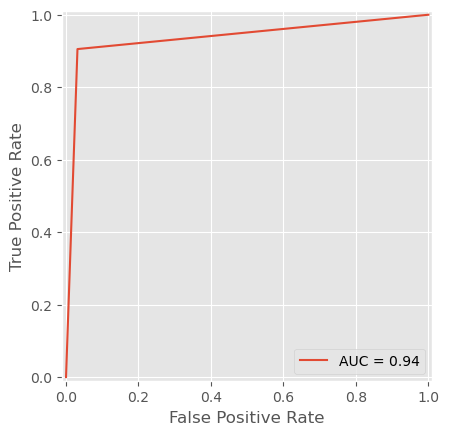

In [219]:
fpr3, tpr3, threshold = roc_curve(y_test1, y_pred3)
roc_auc3 = roc_auc_score(y_test1, y_pred3)
RocCurveDisplay(fpr = fpr3,
                tpr = tpr3,
                roc_auc = roc_auc3).plot()
plt.show()

## Best Model Selection

In [220]:
mod = pd.DataFrame({'Model':['LR1','DT1','RF1'],
                   'Accuracy(%)':[accuracy_score(y_test1, y_pred1)*100,
                                  accuracy_score(y_test1, y_pred2)*100,
                                  accuracy_score(y_test1, y_pred3)*100
                                  ]})
print(mod)

  Model  Accuracy(%)
0   LR1    93.684211
1   DT1    92.631579
2   RF1    93.684211


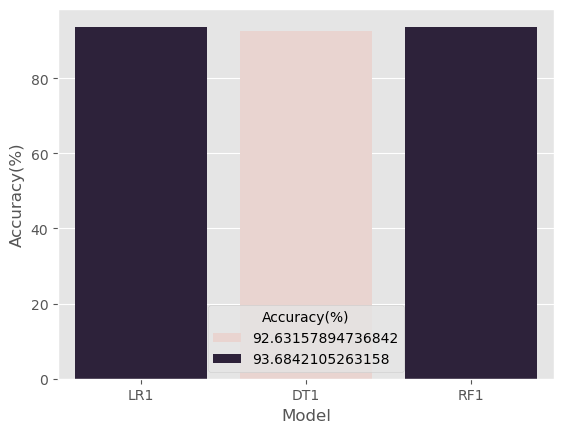

In [221]:
sns.barplot(x = 'Model', y = 'Accuracy(%)', hue = 'Accuracy(%)', data = mod)
plt.show()

In [222]:
import numpy as np
data = [-3.0435406239976,-3.15730712090228,1.08846277997285,2.2886436183814,1.35980512966107,-1.06482252298131,0.325574266158614,-0.0677936531906277,-0.270952836226548,-0.838586564582682,-0.414575448285725,-0.503140859566824,0.676501544635863,-1.69202893305906,2.00063483909015,0.666779695901966,0.599717413841732,1.72532100745514,0.283344830149495,2.10233879259444,0.661695924845707,0.435477208966341,1.37596574254306,-0.293803152734021,0.279798031841214,-0.145361714815161,-0.252773122530705,0.0357642251788156,529]
data = np.asarray(data).reshape(1, -1)

In [228]:
#credit.iloc[616, :]

In [230]:
credit2.iloc[616, -1:]

Class    1.0
Name: 623, dtype: float64

In [233]:
prediction = RF1.predict(data)

if (prediction == 0):
    print('The transaction is \033[32mNormal')
else:
    print('The transaction is \033[31mFraudulent')

The transaction is Fraudulent


# OverSampling

In [234]:
credit3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.233169,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.347092,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.137702,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.130015,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.081308,0


In [235]:
credit3.shape

(275663, 30)

In [236]:
X = credit3.iloc[:,:-1]
y = credit3.iloc[:,-1]

In [237]:
print(X)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10       V11       V12       V13  \
0       0.239599  0.098698  0.363787  0.090794 -0.55160

In [238]:
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64


## Train Test Split

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, stratify = y, random_state = 52)

In [242]:
X_train2, y_train2 = SMOTE(random_state = 52).fit_resample(X_train, y_train)

In [243]:
X_train2.shape

(440304, 29)

In [244]:
y_train2.shape

(440304,)

In [246]:
y_train2.value_counts()

Class
0    220152
1    220152
Name: count, dtype: int64

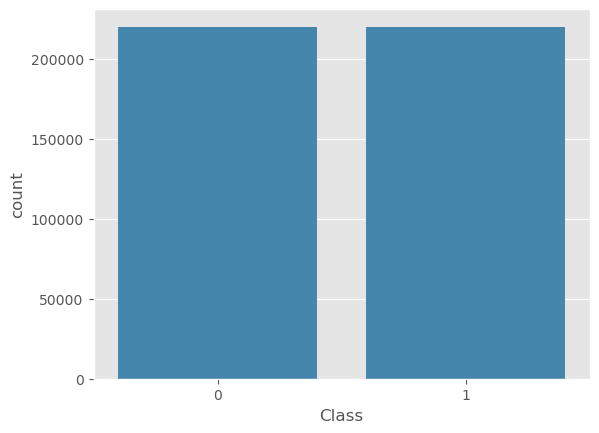

In [249]:
sns.countplot(x = y_train2)
plt.show()

## Modeling

### Logistic Regression

In [250]:
LR = LogisticRegression(random_state = 52)
LR.fit(X_train2, y_train2)
LR.score(X_train2, y_train2)

0.9439023947091101

In [251]:
y_pred1 = LR.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred1, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred1),
      '\n\nAccuracy Score:\n', accuracy_score(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     55038
       Fraud       0.06      0.88      0.11        95

    accuracy                           0.98     55133
   macro avg       0.53      0.93      0.55     55133
weighted avg       1.00      0.98      0.99     55133
 
Confusion Matrix:
 [[53679  1359]
 [   11    84]] 

Accuracy Score:
 0.9751509984945496


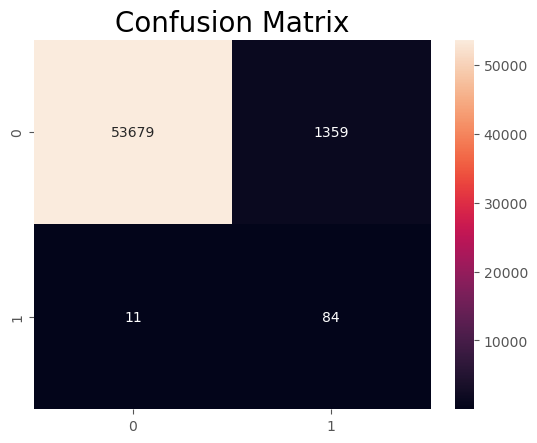

In [252]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, fmt='d')
plt.title('Confusion Matrix', size = 20)
plt.show()

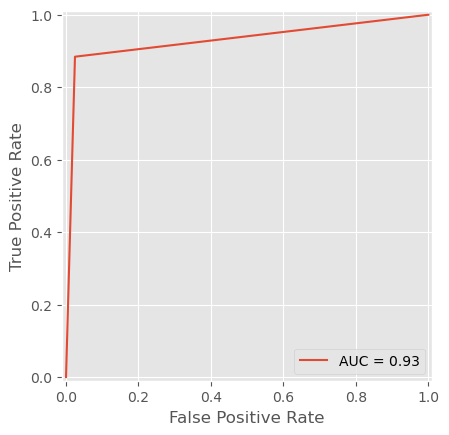

In [253]:
fpr1, tpr1, threshold = roc_curve(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, y_pred1)
RocCurveDisplay(fpr = fpr1, tpr = tpr1, roc_auc = roc_auc1).plot()
plt.show()

### Decision Tree Classifier

In [256]:
DT = DecisionTreeClassifier(random_state = 52)
DT.fit(X_train2, y_train2)
DT.score(X_train2, y_train2)

1.0

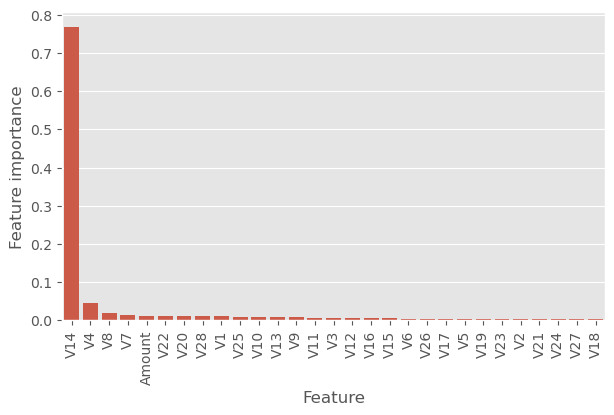

In [257]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': DT.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
sns.barplot(x='Feature', y='Feature importance',data=tmp)
plt.xticks(rotation=90)
plt.show()

In [258]:
y_pred2 = DT.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred2, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred2),
      '\n\nAccuracy Score:\n', accuracy_score(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55038
       Fraud       0.40      0.72      0.51        95

    accuracy                           1.00     55133
   macro avg       0.70      0.86      0.76     55133
weighted avg       1.00      1.00      1.00     55133
 
Confusion Matrix:
 [[54935   103]
 [   27    68]] 

Accuracy Score:
 0.9976420655505777


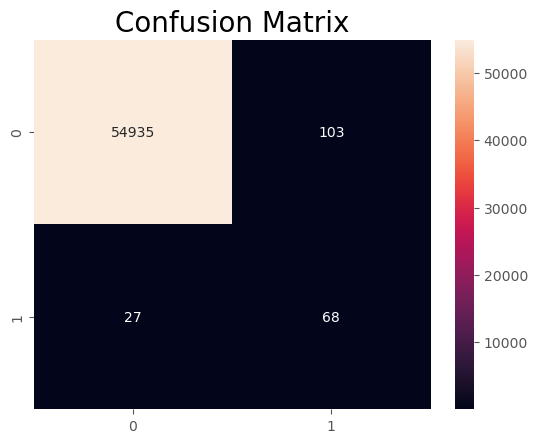

In [259]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, fmt = 'd')
plt.title('Confusion Matrix', size = 20)
plt.show()

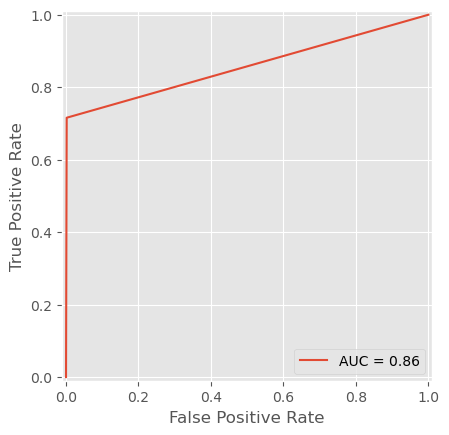

In [260]:
fpr2, tpr2, threshold = roc_curve(y_test, y_pred2)
roc_auc2 = roc_auc_score(y_test, y_pred2)
RocCurveDisplay(fpr = fpr2, tpr = tpr2, roc_auc = roc_auc2).plot()
plt.show()

### Random Forest Classifier

In [261]:
RF = RandomForestClassifier(random_state=52)
RF.fit(X_train2, y_train2)
RF.score(X_train2, y_train2)

1.0

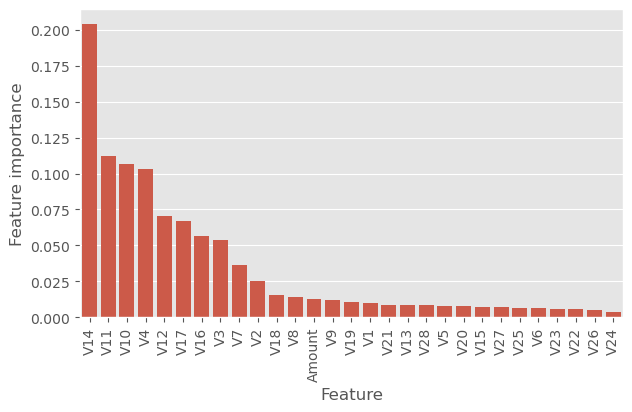

In [272]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': RF.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
sns.barplot(x='Feature', y='Feature importance',data=tmp)
plt.xticks(rotation=90)
plt.show()

In [273]:
y_pred3 = RF.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred3, target_names = ['Not Fraud', 'Fraud']),
      '\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred3),
      '\n\nAccuracy Score:\n', accuracy_score(y_test, y_pred3))

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55038
       Fraud       0.89      0.77      0.82        95

    accuracy                           1.00     55133
   macro avg       0.94      0.88      0.91     55133
weighted avg       1.00      1.00      1.00     55133
 
Confusion Matrix:
 [[55029     9]
 [   22    73]] 

Accuracy Score:
 0.9994377233235993


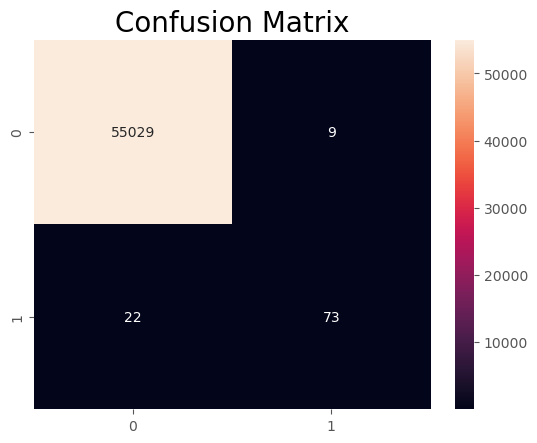

In [274]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot = True, fmt = 'd')
plt.title('Confusion Matrix', size = 20)
plt.show()

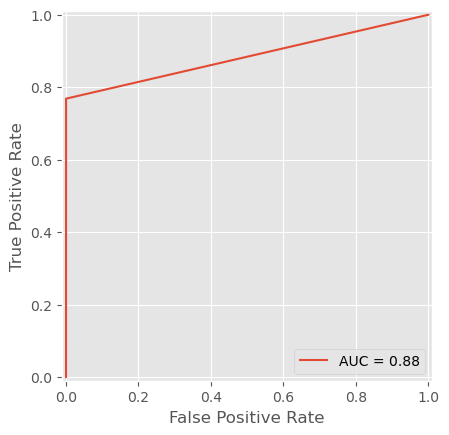

In [275]:
fpr3, tpr3, threshold = roc_curve(y_test, y_pred3)
roc_auc3 = roc_auc_score(y_test, y_pred3)
RocCurveDisplay(fpr = fpr3, tpr = tpr3, roc_auc = roc_auc3).plot()
plt.show()

# Best Model Selection

In [276]:
mod = pd.DataFrame({'Model':['LR','DT','RF'],
                   'Accuracy(%)':[accuracy_score(y_test, y_pred1)*100,
                                  accuracy_score(y_test, y_pred2)*100,
                                  accuracy_score(y_test, y_pred3)*100
                                  ]})

In [277]:
print(mod)

  Model  Accuracy(%)
0    LR    97.515100
1    DT    99.764207
2    RF    99.943772


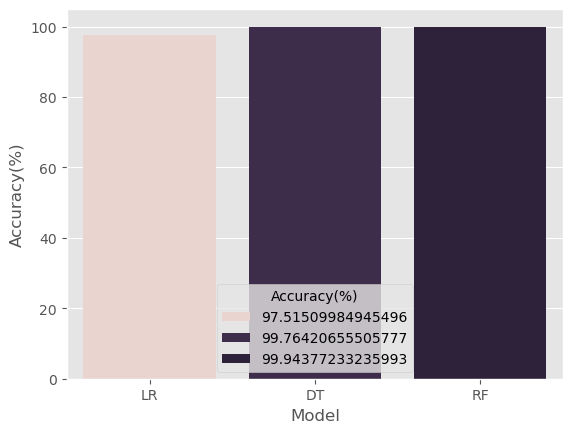

In [278]:
sns.barplot(x = 'Model', y = 'Accuracy(%)', hue = 'Accuracy(%)', data = mod)
plt.show()

In [279]:
# Random Forest Classifier is the best model with 99.94% accuracy

# Save The Model

In [282]:
save_model = pickle.dumps(RF)

### Load saved model

In [283]:
RFC_model = pickle.loads(save_model)

In [284]:
data = [[-3.0435406239976,-3.15730712090228,1.08846277997285,2.2886436183814,1.35980512966107,-1.06482252298131,0.325574266158614,-0.0677936531906277,-0.270952836226548,-0.838586564582682,-0.414575448285725,-0.503140859566824,0.676501544635863,-1.69202893305906,2.00063483909015,0.666779695901966,0.599717413841732,1.72532100745514,0.283344830149495,2.10233879259444,0.661695924845707,0.435477208966341,1.37596574254306,-0.293803152734021,0.279798031841214,-0.145361714815161,-0.252773122530705,0.0357642251788156,529]]

In [285]:
RFC_model.predict(data)

if (prediction == 0):
    print('The transaction is \033[32mNormal')
else:
    print('The transaction is \033[31mFraudulent')

The transaction is Fraudulent


In [286]:
RFC_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [287]:
with open('Credit_Card_Model.pkl', 'wb') as file:
    pickle.dump(RFC_model, file)

In [288]:
with open('Credit_Card_Model.pkl', 'rb') as file:
    credit_model = pickle.load(file)

In [289]:
prediction = credit_model.predict(data)

if (prediction[0] == 0):
    print('The transaction is \033[32mNormal')
else:
    print('The transaction is \033[31mFraudulent')

The transaction is Fraudulent


# OR

In [290]:
import joblib
joblib.dump(RF, 'Credit_Card_Model.plk')

['Credit_Card_Model.plk']

In [291]:
model = joblib.load('Credit_Card_Model.plk')

In [312]:
data = np.asarray(credit2.iloc[615, 0:29]).reshape(1, -1)

In [313]:
prediction = model.predict(data)

if (prediction[0] == 0):
    print('The transaction is \033[32mNormal')
else:
    print('The transaction is \033[31mFraudulent')

The transaction is Normal


In [314]:
# Check whether the prediction is correct or not
original_class = credit2.iloc[615, -1:]

if (original_class[0] == prediction[0]):
    print('The prediction is \033[32mRight')
else:
    print('The Prediction is \033[31mWrong')

The prediction is Right
